In [2]:
import astropy.units as u
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from einsteinpy.coordinates import BoyerLindquistDifferential
from einsteinpy.metric import Kerr

In [3]:
# Metric or Black Hole parameters - Mass, M and Spin Parameter, a
M = 4e30 * u.kg
a1 = 0.4 * u.one
a2 = 0.9 * u.one # Extremal Kerr Black Hole

# Coordinate object to initialize metric with
# Note that, for this example
# the coordinate values below are irrelevant
bl = BoyerLindquistDifferential(
    t=0. * u.s,
    r=1e3 * u.m,
    theta=np.pi / 2 * u.rad,
    phi=np.pi * u.rad,
    v_r=0. * u.m / u.s,
    v_th=0. * u.rad / u.s,
    v_p=0. * u.rad / u.s,
)

# Defining two Kerr Black Holes, one with a higher spin parameter
kerr1 = Kerr(coords=bl, M=M, a=a1)
kerr2 = Kerr(coords=bl, M=M, a=a2)

# Getting the list of singularities
sing_dict1 = kerr1.singularities()
sing_dict2 = kerr2.singularities()

# Let's check the contents of the dicts
# 'ergosphere' entries should be functions
print(sing_dict1, sing_dict2, sep="\n\n")

{'inner_ergosphere': <function BaseMetric.singularities.<locals>._in_ergo at 0x7f19f3846fc0>, 'inner_horizon': 247.98878315867296, 'outer_horizon': 5692.939432136259, 'outer_ergosphere': <function BaseMetric.singularities.<locals>._out_ergo at 0x7f19f3845bc0>}

{'inner_ergosphere': <function BaseMetric.singularities.<locals>._in_ergo at 0x7f19f3845b20>, 'inner_horizon': 1675.668821582463, 'outer_horizon': 4265.259393712469, 'outer_ergosphere': <function BaseMetric.singularities.<locals>._out_ergo at 0x7f19f3847060>}


In [4]:
# Sampling Polar Angle for plotting in Polar Coordinates
theta = np.linspace(0, 2 * np.pi, 100)

# Ergospheres
# These are functions
Ei1, Eo1 = sing_dict1["inner_ergosphere"], sing_dict1["outer_ergosphere"]
Ei2, Eo2 = sing_dict2["inner_ergosphere"], sing_dict2["outer_ergosphere"]

# Creating lists of points on Ergospheres for different polar angles, for both black holes
Ei1_list, Eo1_list = Ei1(theta), Eo1(theta)
Ei2_list, Eo2_list = Ei2(theta), Eo2(theta)

# For Black Hole 1 (a = 0.4)
Xei1 = Ei1_list * np.sin(theta)
Yei1 = Ei1_list * np.cos(theta)

Xeo1 = Eo1_list * np.sin(theta)
Yeo1 = Eo1_list * np.cos(theta)

# For Black Hole 2 (a = 0.9)
Xei2 = Ei2_list * np.sin(theta)
Yei2 = Ei2_list * np.cos(theta)

Xeo2 = Eo2_list * np.sin(theta)
Yeo2 = Eo2_list * np.cos(theta)

# Event Horizons
Hi1, Ho1 = sing_dict1["inner_horizon"], sing_dict1["outer_horizon"]
Hi2, Ho2 = sing_dict2["inner_horizon"], sing_dict2["outer_horizon"]

# For Black Hole 1 (a = 0.4)
Xhi1 = Hi1 * np.sin(theta)
Yhi1 = Hi1 * np.cos(theta)

Xho1 = Ho1 * np.sin(theta)
Yho1 = Ho1 * np.cos(theta)

# For Black Hole 2 (a = 0.9)
Xhi2 = Hi2 * np.sin(theta)
Yhi2 = Hi2 * np.cos(theta)

Xho2 = Ho2 * np.sin(theta)
Yho2 = Ho2 * np.cos(theta)

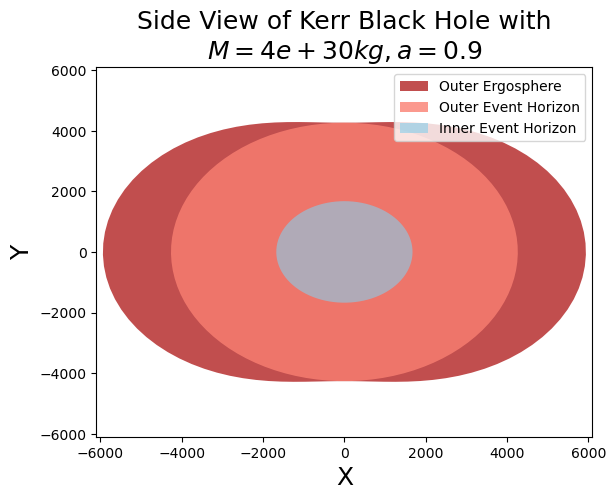

In [17]:
fig, ax = plt.subplots()

# ax1.fill(Xei1, Yei1, 'b', Xeo1, Yeo1, 'r', Xhi1, Yhi1, 'b', Xho1, Yho1, 'r', alpha=0.3)
# ax1.set_title(f"$M = {M}, a = {a1}$", fontsize=18)
# ax1.set_xlabel("X", fontsize=18)
# ax1.set_ylabel("Y", fontsize=18)
# ax1.set_xlim([-6100, 6100])
# ax1.set_ylim([-6100, 6100])

ax.fill(Xeo2, Yeo2, 'firebrick', label='Outer Ergosphere', alpha=0.8)
ax.fill(Xho2, Yho2, 'salmon', label='Outer Event Horizon', alpha=0.8)
ax.fill(Xhi2, Yhi2, 'skyblue', label='Inner Event Horizon', alpha=0.6)
# ax2.fill(Xei2, Yei2, 'steelblue', label='Inner Ergosphere', alpha=0.7)

ax.set_title(f"Side View of Kerr Black Hole with\n$M = {M}, a = {a2}$", fontsize=18)
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
ax.set_xlim([-6100, 6100])
ax.set_ylim([-6100, 6100])
ax.legend()

plt.show()